## Kumon Report Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/moiznoorali/Documents/Portfolio Projects/Python/Data Cleaning and Visualization/Kumon Analysis/ReportB_Masked.csv')

In [3]:
df.columns

Index(['Full Name', 'Subject', 'First Name', 'Last Name', 'DOB', 'Grade',
       'Level', 'Worksheet No', 'Worksheet Used', 'ASHR', 'ST1'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Full Name       216 non-null    object
 1   Subject         216 non-null    object
 2   First Name      216 non-null    object
 3   Last Name       216 non-null    object
 4   DOB             216 non-null    object
 5   Grade           216 non-null    object
 6   Level           216 non-null    object
 7   Worksheet No    216 non-null    int64 
 8   Worksheet Used  216 non-null    int64 
 9   ASHR            61 non-null     object
 10  ST1             216 non-null    object
dtypes: int64(2), object(9)
memory usage: 18.7+ KB


In [5]:
df.describe()

,Worksheet No,Worksheet Used
count,216.000000,216.000000
mean,109.953704,145.000000
std,57.945425,73.585893
min,10.000000,10.000000
25%,60.000000,90.000000
50%,110.000000,140.000000
75%,160.000000,170.000000
max,200.000000,320.000000


In [6]:
df.shape

(216, 11)

In [7]:
df.head()

,Full Name,Subject,First Name,Last Name,DOB,Grade,Level,Worksheet No,Worksheet Used,ASHR,ST1
0,Student #1,Reading,Student,#1,7/3/15,3,CII,130,110,NaN,C
1,Student #2,Reading,Student,#2,4/7/17,1,2A,130,180,NaN,C
2,Student #3,Math,Student,#3,5/1/14,4,D,70,130,NaN,C
3,Student #4,Reading,Student,#4,5/1/14,4,CI,20,230,NaN,C
4,Student #5,Math,Student,#5,4/18/18,PK1,4A,130,70,NaN,C


#### Turning the Date column to DateTime type

In [8]:
df['DOB'] = pd.to_datetime(df['DOB'])

/var/folders/ll/swcx6pfs10j40kd6231x3rb00000gp/T/ipykernel_18185/1662918849.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


In [9]:
df.head()

,Full Name,Subject,First Name,Last Name,DOB,Grade,Level,Worksheet No,Worksheet Used,ASHR,ST1
0,Student #1,Reading,Student,#1,2015-07-03,3,CII,130,110,NaN,C
1,Student #2,Reading,Student,#2,2017-04-07,1,2A,130,180,NaN,C
2,Student #3,Math,Student,#3,2014-05-01,4,D,70,130,NaN,C
3,Student #4,Reading,Student,#4,2014-05-01,4,CI,20,230,NaN,C
4,Student #5,Math,Student,#5,2018-04-18,PK1,4A,130,70,NaN,C


In [10]:
grade_level = df[['Subject', 'Full Name',
                  'Grade', 'Level']].groupby(by = 'Level').head(20).reset_index(drop = True)
grade_level

,Subject,Full Name,Grade,Level
0,Reading,Student #1,3,CII
1,Reading,Student #2,1,2A
2,Math,Student #3,4,D
3,Reading,Student #4,4,CI
4,Math,Student #5,PK1,4A
...,...,...,...,...
208,Reading,Student #211,4,DII
209,Math,Student #212,PK1,4A
210,Reading,Student #213,PK1,4A
211,Reading,Student #214,2,CI


In [11]:
df2 = df[(df['Worksheet Used'] >= 1) & (df['Worksheet Used'] <= 400)]
df2

,Full Name,Subject,First Name,Last Name,DOB,Grade,Level,Worksheet No,Worksheet Used,ASHR,ST1
0,Student #1,Reading,Student,#1,2015-07-03,3,CII,130,110,NaN,C
1,Student #2,Reading,Student,#2,2017-04-07,1,2A,130,180,NaN,C
2,Student #3,Math,Student,#3,2014-05-01,4,D,70,130,NaN,C
3,Student #4,Reading,Student,#4,2014-05-01,4,CI,20,230,NaN,C
4,Student #5,Math,Student,#5,2018-04-18,PK1,4A,130,70,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
211,Student #212,Math,Student,#212,2019-06-17,PK1,4A,200,70,NaN,C
212,Student #213,Reading,Student,#213,2019-06-17,PK1,4A,110,80,NaN,C
213,Student #214,Reading,Student,#214,2016-03-13,2,CI,20,200,NaN,C
214,Student #215,Reading,Student,#215,2017-10-17,K,2A,20,130,NaN,C


In [12]:
wkst_count = df2['Worksheet Used'].value_counts()
wkst_count

Worksheet Used
160    23
150    23
80     15
100    15
140    13
70     11
120    11
300    10
110     9
130     8
60      8
90      7
50      7
200     6
280     6
290     6
170     5
40      5
180     4
230     4
210     3
20      3
190     2
240     2
250     2
310     2
260     1
220     1
270     1
320     1
10      1
30      1
Name: count, dtype: int64

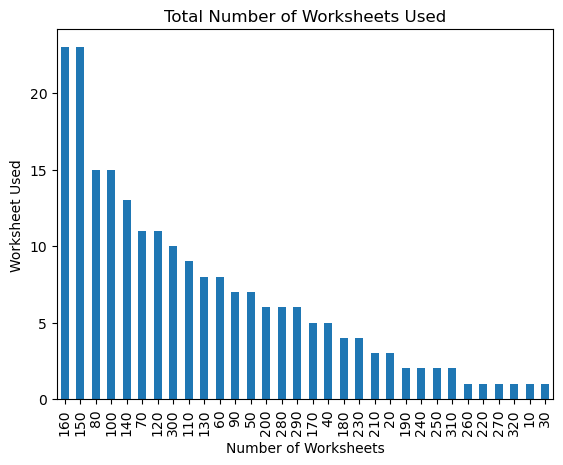

In [13]:
wkst_count.plot(x = "Level",y = "Worksheet Used",kind = "bar")
plt.title("Total Number of Worksheets Used")
plt.xlabel("Number of Worksheets")
plt.ylabel("Worksheet Used")
plt.show()

In [14]:
df['Level'] = df2['Level'].apply(lambda x: x.upper())
df_new = pd.merge(df, df2,how = 'left', on = 'Level')

In [15]:
student_levels = pd.DataFrame(df.groupby('Full Name')['Level'].count().
                              sort_values(ascending = False).reset_index()).head()
student_levels

,Full Name,Level
0,Student #1,1
1,Student #38,1
2,Student #28,1
3,Student #29,1
4,Student #3,1


In [16]:
df.describe()

,DOB,Worksheet No,Worksheet Used
count,216,216.000000,216.000000
mean,2015-10-14 02:33:20,109.953704,145.000000
min,2008-10-13 00:00:00,10.000000,10.000000
25%,2014-01-17 00:00:00,60.000000,90.000000
50%,2016-02-15 00:00:00,110.000000,140.000000
75%,2017-10-14 00:00:00,160.000000,170.000000
max,2020-12-19 00:00:00,200.000000,320.000000
std,NaN,57.945425,73.585893


In [17]:
df['Level'].value_counts()

Level
2A     23
B      15
3A     15
D      14
C      12
AI     12
BI     12
4A     11
A      11
CII     9
E       9
CI      8
F       8
DII     7
BII     7
5A      7
AII     6
EII     5
G       5
H       4
DI      4
6A      3
I       3
FII     2
EI      2
FI      1
GII     1
Name: count, dtype: int64

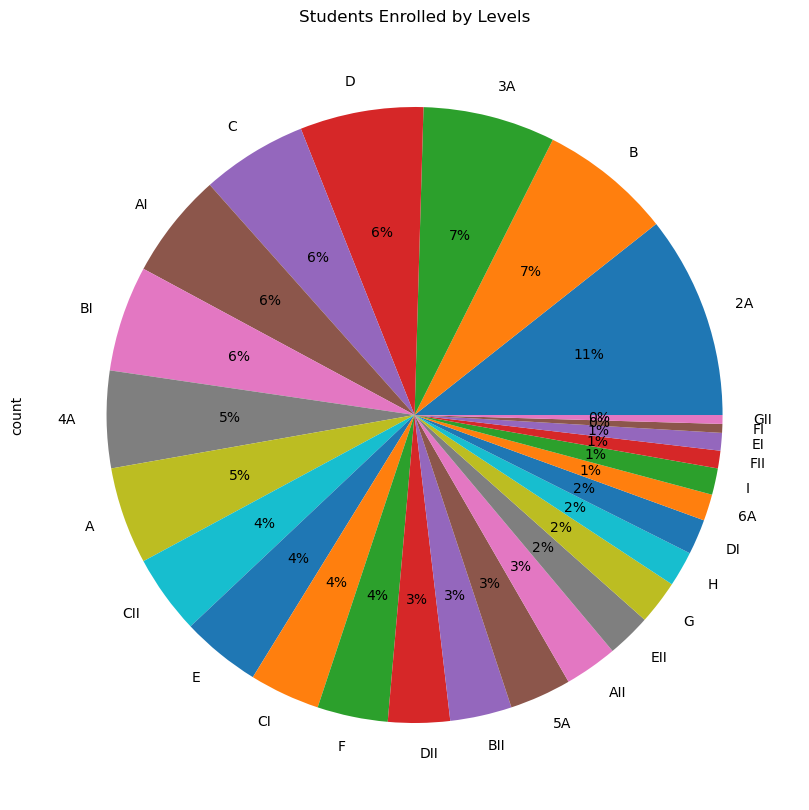

In [18]:
df["Level"].value_counts().plot.pie(figsize = (10, 10),
                                    autopct = '%1.0f%%')
plt.title("Students Enrolled by Levels")
plt.xticks(rotation = 90)
plt.show()

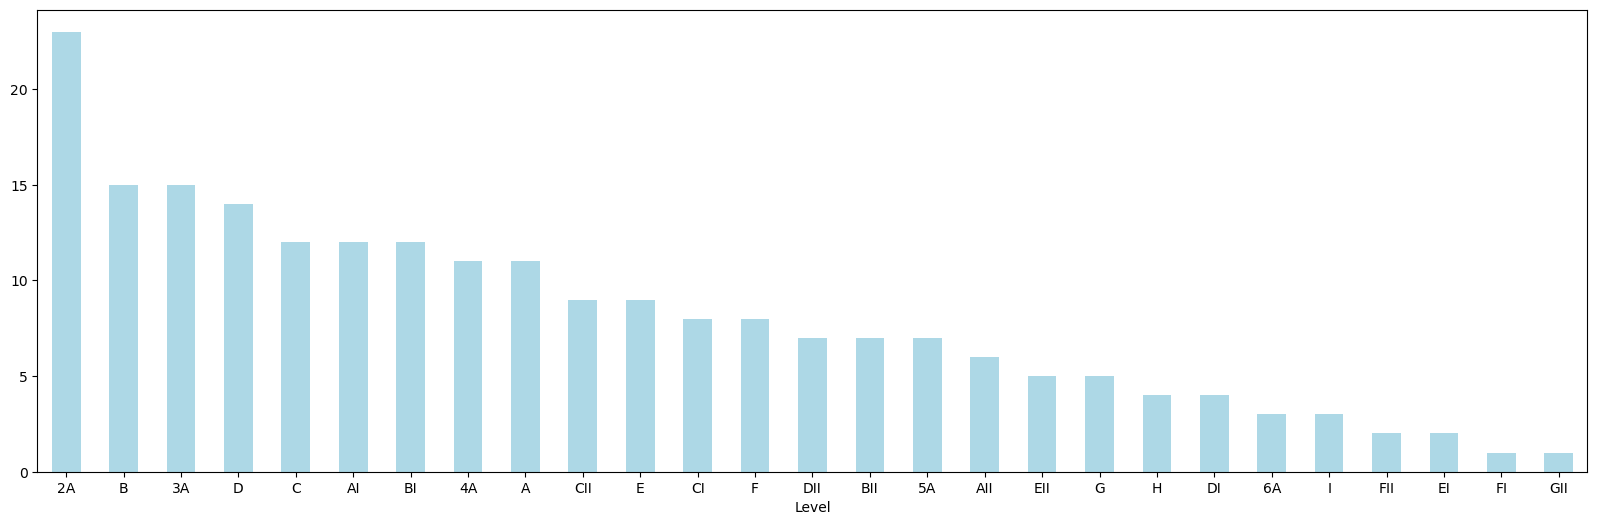

In [19]:
plt.figure(figsize = (20,6))
df['Level'].value_counts().plot(kind = 'bar',rot = 0, color = "#ADD8E6");

In [20]:
df['Subject'].value_counts()

Subject
Reading    110
Math       106
Name: count, dtype: int64

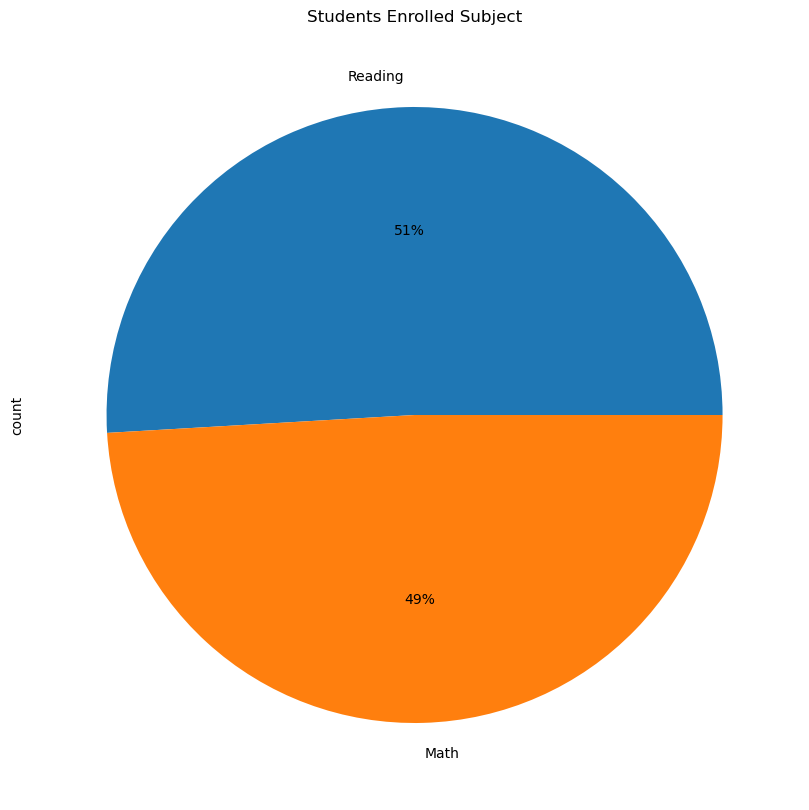

In [21]:
df['Subject'].value_counts().plot.pie(figsize = (10, 10), autopct = '%1.0f%%')
plt.title("Students Enrolled Subject")
plt.xticks(rotation = 90)
plt.show()

In [22]:
math_df = df[df['Subject'] == 'Math']
math_counts = math_df['Level'].value_counts()

Text(0.5, 1.0, 'Math')

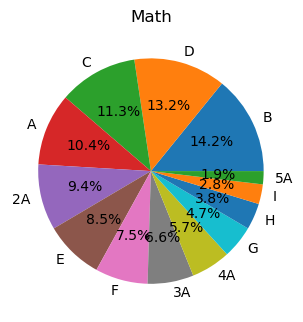

In [23]:
plt.figure(figsize = (8, 6))
plt.subplot(1, 2, 1)
plt.pie(math_counts, labels = math_counts.index, autopct = '%1.1f%%')
plt.title('Math')

In [24]:
read_df = df[df['Subject'] == 'Reading']
read_counts = read_df['Level'].value_counts()

Text(0.5, 1.0, 'Reading')

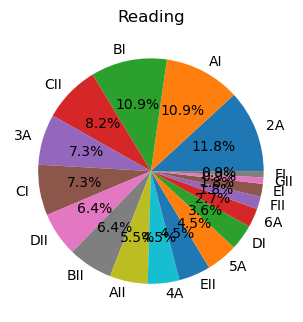

In [25]:
plt.figure(figsize = (8, 6))
plt.subplot(1, 2, 1)
plt.pie(read_counts, labels = read_counts.index, autopct = '%1.1f%%')
plt.title('Reading')

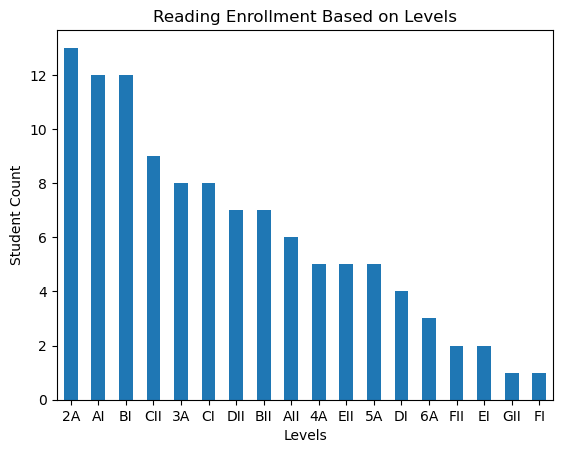

In [26]:
read_counts.plot(x = "Subject",y = "Levels",kind = "bar", rot = 0)
plt.title("Reading Enrollment Based on Levels")
plt.xlabel("Levels")
plt.ylabel("Student Count")
plt.show()

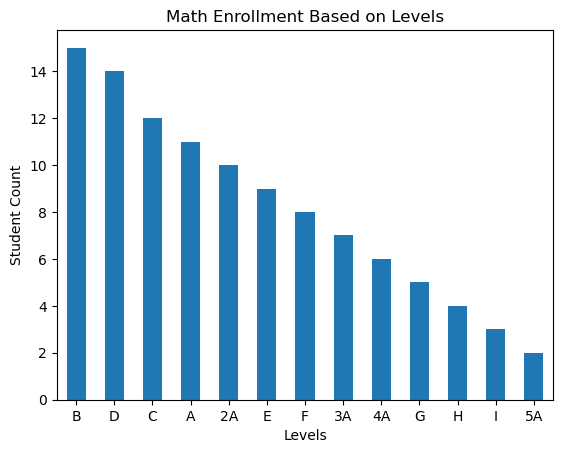

In [27]:
math_counts.plot(x = "Subject",y = "Levels",kind = "bar", rot = 0)
plt.title("Math Enrollment Based on Levels")
plt.xlabel("Levels")
plt.ylabel("Student Count")
plt.show()

#### Number of worksheets used based on levels

In [28]:
df['Worksheet Used'].value_counts()

Worksheet Used
160    23
150    23
80     15
100    15
140    13
70     11
120    11
300    10
110     9
130     8
60      8
90      7
50      7
200     6
280     6
290     6
170     5
40      5
180     4
230     4
210     3
20      3
190     2
240     2
250     2
310     2
260     1
220     1
270     1
320     1
10      1
30      1
Name: count, dtype: int64

In [29]:
wksht_used = df[['Level', 'Worksheet Used', 'Subject']].groupby(by = 'Level').head(20).reset_index(drop = True)
wksht_used

,Level,Worksheet Used,Subject
0,CII,110,Reading
1,2A,180,Reading
2,D,130,Math
3,CI,230,Reading
4,4A,70,Math
...,...,...,...
208,DII,100,Reading
209,4A,70,Math
210,4A,80,Reading
211,CI,200,Reading


In [30]:
reading_used = wksht_used[wksht_used['Subject'] == 'Reading']
reading_used

,Level,Worksheet Used,Subject
0,CII,110,Reading
1,2A,180,Reading
3,CI,230,Reading
5,5A,90,Reading
7,AII,300,Reading
...,...,...,...
206,EII,150,Reading
208,DII,100,Reading
210,4A,80,Reading
211,CI,200,Reading


In [31]:
reading_used = reading_used.drop(columns = ['Subject'])
agg_reading_used = reading_used.groupby('Level').sum().reset_index()
agg_reading_used

,Level,Worksheet Used
0,2A,2400
1,3A,1510
2,4A,740
3,5A,950
4,6A,670
5,AI,2190
6,AII,1010
7,BI,2360
8,BII,1160
9,CI,1310


In [32]:
math_used = wksht_used[wksht_used['Subject'] == 'Math']
math_used

,Level,Worksheet Used,Subject
2,D,130,Math
4,4A,70,Math
6,B,190,Math
9,F,160,Math
11,2A,100,Math
...,...,...,...
200,C,100,Math
201,D,110,Math
203,B,150,Math
207,E,100,Math


In [33]:
math_used = math_used.drop(columns = ['Subject'])
agg_math_used = math_used.groupby('Level').sum().reset_index()
agg_math_used

,Level,Worksheet Used
0,2A,1360
1,3A,1020
2,4A,1080
3,5A,580
4,A,1380
5,B,1790
6,C,1580
7,D,1390
8,E,940
9,F,720


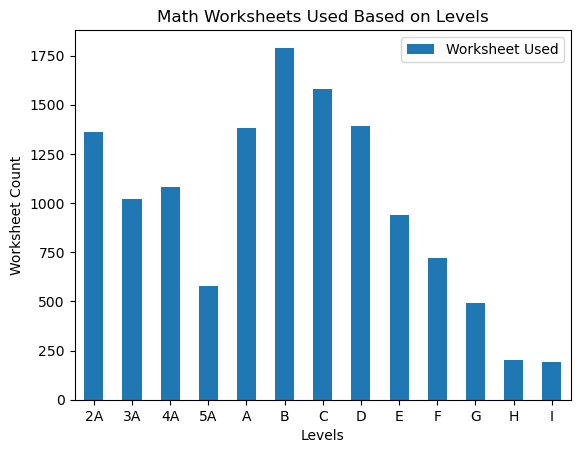

In [34]:
agg_math_used.plot(x = "Level",y = "Worksheet Used",kind = "bar", rot = 0)
plt.title("Math Worksheets Used Based on Levels")
plt.xlabel("Levels")
plt.ylabel("Worksheet Count")
plt.show()

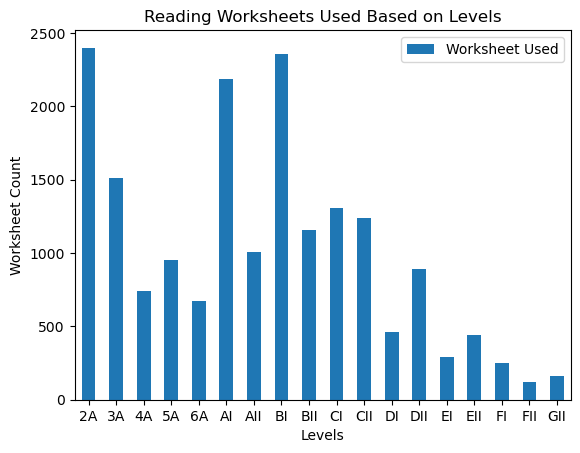

In [35]:
agg_reading_used.plot(x = "Level",y = "Worksheet Used",kind = "bar", rot = 0)
plt.title("Reading Worksheets Used Based on Levels")
plt.xlabel("Levels")
plt.ylabel("Worksheet Count")
plt.show()